# Importation

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns
import warnings
import statsmodels
import time
import scipy.stats as st
import statsmodels.formula.api
import statsmodels.api
from numpy.random import randn
from numpy.random import seed
from scipy.stats import spearmanr
from scipy import stats
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import preprocessing, cluster, metrics, decomposition
from seaborn import pairplot, heatmap
from sklearn.decomposition import PCA
from sklearn import decomposition, preprocessing
from kneed import KneeLocator

In [91]:
#Option d'affichage à 100 lignes max
pd.set_option('display.max_rows', 150)

In [92]:
dispo_alim= pd.read_csv("./dispo_alim.csv")
dispo_alim= dispo_alim.set_index('Zone')
dispo_alim

Unnamed: 0  \
Zone                              
Afghanistan                   0   
Afrique du Sud                1   
Albanie                       2   
Allemagne                     4   
Angola                        5   
...                         ...   
Zimbabwe                    159   
Égypte                      160   
Émirats arabes unis         161   
Équateur                    162   
Îles Salomon                165   

                     Disponibilité de protéines en quantité (g/personne/an)  \
Zone                                                                          
Afghanistan                                                     248.20        
Afrique du Sud                                                 5281.55        
Albanie                                                        2456.45        
Allemagne                                                      3398.15        
Angola                                                         1449.05        
...                                                                ...        
Zimbabwe                                                       1036.60        
Égypte                                                         1854.20        
Émirats arabes unis                                            6055.35        
Équateur                                                       2263.00        
Îles Salomon                                                   1649.80        

                     Production  Exportations - Quantité  \
Zone                                                       
Afghanistan                40.0                      0.0   
Afrique du Sud           1715.0                     74.0   
Albanie                    14.0                      0.0   
Allemagne                1624.0                    683.0   
Angola                     73.0                      0.0   
...                         ...                      ...   
Zimbabwe                  106.0                      0.0   
Égypte                   1233.0                      6.0   
Émirats arabes unis        86.0                    104.0   
Équateur                  342.0                      0.0   
Îles Salomon               10.0                      4.0   

                     Importations - Quantité  Poisson  Volaille  Viande  \
Zone                                                                      
Afghanistan                             29.0      0.0      57.0    12.0   
Afrique du Sud                         516.0      4.0    2118.0    36.0   
Albanie                                 40.0      2.0      47.0     0.0   
Allemagne                              988.0     30.0    1739.0   178.0   
Angola                                 277.0     22.0     319.0    10.0   
...                                      ...      ...       ...     ...   
Zimbabwe                                 7.0      1.0      76.0    37.0   
Égypte                                 123.0     14.0    1250.0   121.0   
Émirats arabes unis                    485.0     51.0     412.0    22.0   
Équateur                                 0.0      1.0     341.0     1.0   
Îles Salomon                             7.0      7.0       3.0     0.0   

                     Population  PIB/habitant  stabilitepolitique  \
Zone                                                                
Afghanistan          36296113.0        2058.4               -2.80   
Afrique du Sud       57009756.0       13860.3               -0.28   
Albanie               2884169.0       12771.0                0.38   
Allemagne            82658409.0       53071.5                0.59   
Angola               29816766.0        7310.9               -0.38   
...                         ...           ...                 ...   
Zimbabwe             14236595.0        3795.6               -0.71   
Égypte               96442591.0       11014.5               -1.42   
Émirats arabes unis   9487203.0       67183.6                0.62   
Équateur             

In [93]:
#On supprime la colonne 
dispo_alim = dispo_alim.drop('Unnamed: 0', axis=1)

# On centre-réduit

In [94]:
X = dispo_alim.values
# On instancie
scaler = StandardScaler()
# On fit
scaler.fit(X)

# On transforme
X_scaled = scaler.transform(X)

In [95]:
# On vérifie les données centrées réduites
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

0    1    2    3    4    5    6    7    8    9    10   11   12
mean -0.0  0.0  0.0 -0.0 -0.0 -0.0  0.0 -0.0 -0.0 -0.0  0.0  0.0 -0.0
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [96]:
#On crée un dataframe de nos données centrées réduites car on s'en servira pour afficher la heatmap des centroïds
df_s = pd.DataFrame(X_scaled, index=dispo_alim.index, columns=dispo_alim.columns)
df_s.head()

Disponibilité de protéines en quantité (g/personne/an)  \
Zone                                                                     
Afghanistan                                             -1.258923        
Afrique du Sud                                           1.084957        
Albanie                                                 -0.230607        
Allemagne                                                0.207914        
Angola                                                  -0.699723        

                Production  Exportations - Quantité  Importations - Quantité  \
Zone                                                                           
Afghanistan      -0.442081                -0.318759                -0.362678   
Afrique du Sud    1.926845                 0.024350                 1.613776   
Albanie          -0.478852                -0.318759                -0.318036   
Allemagne         1.798145                 2.848042                 3.529354   
Angola           -0.395409                -0.318759                 0.643812   

                 Poisson  Volaille    Viande  Population  PIB/habitant  \
Zone                                                                     
Afghanistan    -0.235877 -0.404811 -0.173117    0.517003     -0.868274   
Afrique du Sud -0.208045  2.625778  0.240719    1.168003     -0.326754   
Albanie        -0.221961 -0.419515 -0.380034   -0.533086     -0.376736   
Allemagne      -0.027140  2.068479  2.689246    1.974102      1.472417   
Angola         -0.082803 -0.019554 -0.207603    0.313367     -0.627268   

                stabilitepolitique  Croissance annuelle US$ par habitant  \
Zone                                                                       
Afghanistan              -3.338327                             -0.653263   
Afrique du Sud           -0.369504                              1.536635   
Albanie                   0.408045                              0.478129   
Allemagne                 0.655447                             -0.059440   
Angola                   -0.487314                              1.437409   

                Taux_autosuffisance       TDI  
Zone                                           
Afghanistan               -0.345435 -0.054885  
Afrique du Sud             0.118006 -0.478111  
Albanie                   -1.034975  0.694132  
Allemagne                  0.218712  0.159904  
Angola                    -1.144044  0.812609

In [97]:
#Nous enregistrons les noms de nos pays dans une variable zone :
zone = dispo_alim.index
zone
#et nos colonnes, , dans une variable columns :
columns = dispo_alim.columns
columns = dispo_alim.columns
columns

Index(['Disponibilité de protéines en quantité (g/personne/an)', 'Production',
       'Exportations - Quantité', 'Importations - Quantité', 'Poisson',
       'Volaille', 'Viande', 'Population', 'PIB/habitant',
       'stabilitepolitique', 'Croissance annuelle US$ par habitant',
       'Taux_autosuffisance', 'TDI'],
      dtype='object')

# On réalise l'ACP

In [98]:
# On importe la fonction PCA de scikit_learn
from sklearn.decomposition import PCA

# On créé le modèle PCA
model_pca = PCA()

# On fit le modèle avec les données
X_reduced = model_pca.fit_transform(X_scaled)

In [99]:
# La variance captée par chaque nouvelle composante.
model_pca.explained_variance_ratio_
#Ici la 1ère composante capte 29,9% de la variance de nos données initiales, la 2ème 18% etc.

array([3.14486793e-01, 2.00882919e-01, 1.10277184e-01, 9.45508925e-02,
       6.85224779e-02, 6.45937815e-02, 4.59249787e-02, 3.36535170e-02,
       2.45910818e-02, 1.62991757e-02, 1.48594861e-02, 1.11271663e-02,
       2.30545886e-04])

In [100]:
# Enregister cela dans une variable
scree = (model_pca.explained_variance_ratio_*100).round(2)
scree
#Les 2 premières composantes captent donc 29,9+17,4 = 47% de la variance, les 3 premières 29,9+17,4+11,42 = 59% de la variance et ...

array([3.145e+01, 2.009e+01, 1.103e+01, 9.460e+00, 6.850e+00, 6.460e+00,
       4.590e+00, 3.370e+00, 2.460e+00, 1.630e+00, 1.490e+00, 1.110e+00,
       2.000e-02])

In [101]:
#Pour faire une somme cumulée numpy dispose de la fonction cumsum :
scree_cum = scree.cumsum().round()
scree_cum

array([ 31.,  52.,  63.,  72.,  79.,  85.,  90.,  93.,  96.,  97.,  99.,
       100., 100.])

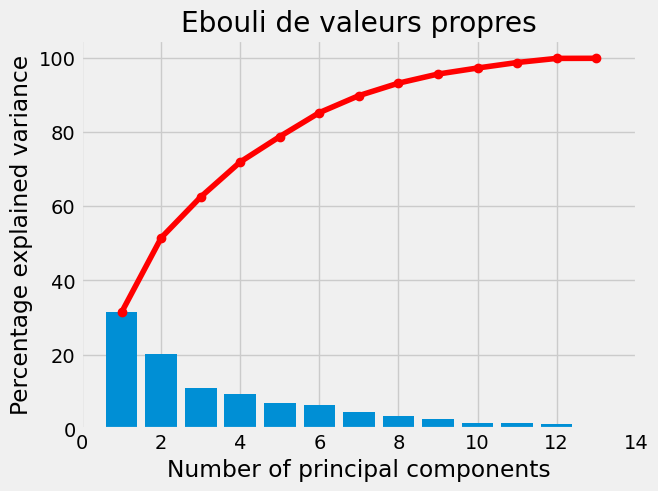

In [102]:
# Scree plot
def display_scree_plot(pca):
    '''Display a scree plot for the pca'''
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("Number of principal components")
    plt.ylabel("Percentage explained variance")
    plt.title("Ebouli de valeurs propres")
    plt.show(block=False)
#Utilisation de la fonction pour tracer le scree plot
display_scree_plot(model_pca) 

In [103]:
#On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée.

In [104]:
#Nombre de composantes qui concentrent près de 70% de la variance
np.argmax(np.cumsum(model_pca.explained_variance_ratio_*100)>= 70)

3

In [105]:
# Le nombre de composantes à étudier est donc de 3
num_components = 3

In [106]:
#Intéressons nous maintenant à nos fameuses composantes. Nous avons dit dans le cours que c'est bien par un calcul que l'on obtient ces composantes.
#La formule de ce calcul nous est donnée par l'attribut components_. Cette variable est généralement nommée pcs :
pcs = model_pca.components_
pcs

array([[ 4.63989321e-02,  4.66929108e-01,  2.95150314e-01,
         3.83707753e-01,  2.64406764e-01,  4.33319288e-01,
         2.98187361e-01,  3.97089385e-01,  7.24213633e-02,
        -6.92938082e-02,  2.23365343e-02,  1.71234493e-01,
        -3.66076147e-02],
       [ 4.10060965e-01, -3.71278028e-02,  2.63908091e-01,
         2.21950800e-01,  6.47300724e-02, -4.54161424e-02,
        -1.84768912e-01, -2.16524177e-01,  4.50174806e-01,
         4.84516043e-01, -2.22745654e-02, -2.25161608e-02,
         4.31127278e-01],
       [ 3.56103330e-01,  1.43859241e-01, -4.62403616e-01,
        -1.17661484e-01, -3.91380600e-01,  3.03932150e-01,
         3.68004677e-01,  4.58251215e-02,  2.04754588e-01,
         1.67385344e-01,  3.43921013e-02, -3.91493187e-01,
        -1.31759901e-01],
       [ 2.80311934e-02, -4.54675246e-02, -1.26249060e-01,
         1.99873211e-01,  2.90209920e-01, -7.94687849e-04,
        -1.42343067e-01,  1.74667819e-01, -1.79669062e-01,
        -1.13342694e-01, -6.39919175e

In [107]:
#Affichons la même chose mais version pandas principal components :
pcs = pd.DataFrame(pcs)
pcs
#On arrondit pour plus de clarté et in rajoute le nom des colonnes
pcs.columns = columns
pcs.round(2)

Disponibilité de protéines en quantité (g/personne/an)  Production  \
0                                                0.05             0.47   
1                                                0.41            -0.04   
2                                                0.36             0.14   
3                                                0.03            -0.05   
4                                                0.11             0.03   
5                                               -0.12            -0.09   
6                                               -0.69            -0.07   
7                                               -0.03            -0.01   
8                                                0.45            -0.24   
9                                                0.04            -0.32   
10                                              -0.00             0.33   
11                                              -0.00            -0.07   
12                                               0.01             0.69   

    Exportations - Quantité  Importations - Quantité  Poisson  Volaille  \
0                      0.30                     0.38     0.26      0.43   
1                      0.26                     0.22     0.06     -0.05   
2                     -0.46                    -0.12    -0.39      0.30   
3                     -0.13                     0.20     0.29     -0.00   
4                     -0.12                     0.13     0.48      0.01   
5                      0.15                     0.12    -0.28     -0.03   
6                     -0.15                     0.05     0.08     -0.04   
7                      0.18                    -0.39     0.39     -0.32   
8                     -0.02                    -0.13     0.18     -0.32   
9                     -0.27                     0.28    -0.11     -0.18   
10                     0.03                    -0.66     0.03      0.16   
11                     0.65                    -0.01    -0.38     -0.14   
12                    -0.16                     0.19    -0.16     -0.66   

    Viande  Population  PIB/habitant  stabilitepolitique  \
0     0.30        0.40          0.07               -0.07   
1    -0.18       -0.22          0.45                0.48   
2     0.37        0.05          0.20                0.17   
3    -0.14        0.17         -0.18               -0.11   
4    -0.20       -0.10         -0.16                0.03   
5     0.29       -0.02         -0.09               -0.41   
6    -0.00        0.20          0.63                0.12   
7     0.66       -0.03         -0.11                0.31   
8     0.03        0.38          0.42               -0.50   
9     0.02        0.60         -0.31                0.41   
10   -0.38        0.38         -0.05                0.08   
11   -0.10        0.25         -0.05                0.12   
12   -0.05       -0.01          0.00               -0.02   

    Croissance annuelle US$ par habitant  Taux_autosuffisance   TDI  
0                                   0.02                 0.17 -0.04  
1                                  -0.02                -0.02  0.43  
2                                   0.03                -0.39 -0.13  
3                                  -0.64                -0.57  0.18  
4                                   0.67                -0.42 -0.15  
5                                   0.31                -0.24  0.66  
6                                   0.08                -0.19 -0.01  
7                                  -0.06                -0.09  0.06  
8                                   0.05                 0.08 -0.10  
9                                   0.15                 0.19  0.14  
10                                  0.09                -0.03  0.35  
11                                  0.04                -0.42 -0.38  
12                                 -0.00                -0.02  0.00

# Cercles de corrélation et projections des individus

In [108]:
#Fonction pour afficher la projection des individus
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()


Composantes F1 et F2

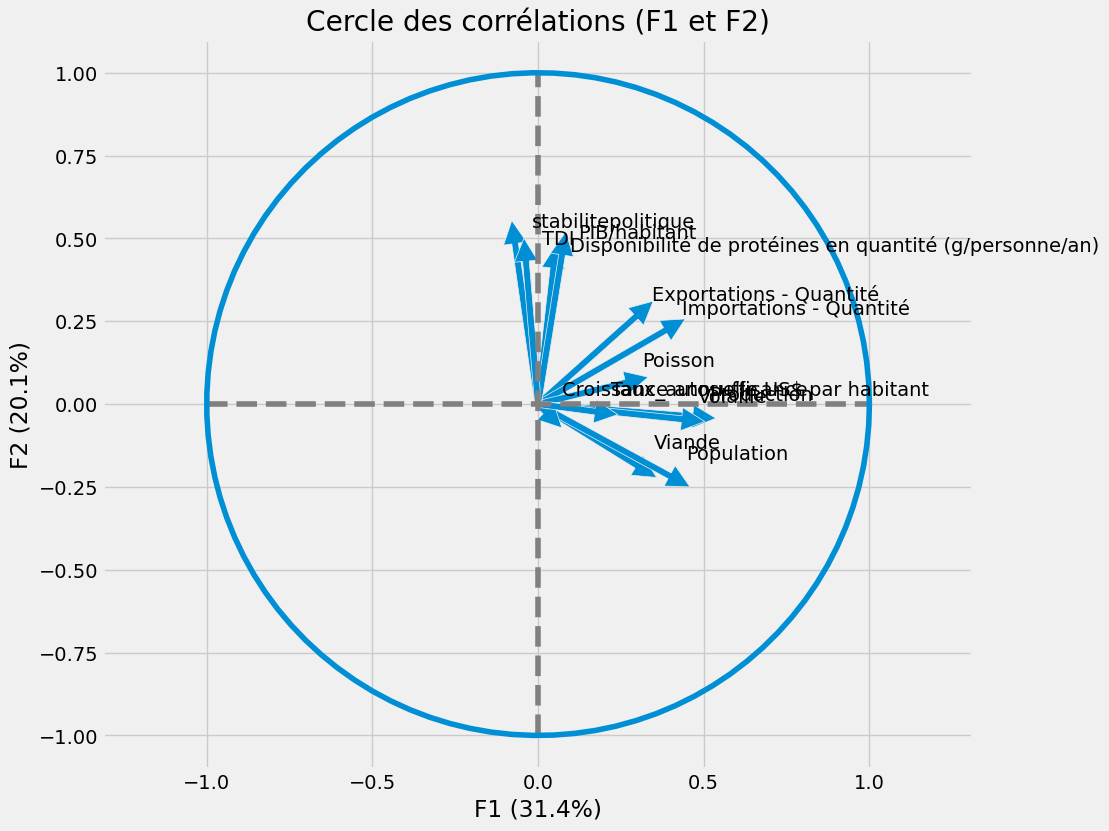

In [109]:
#Définissons nos axes x et y. Nous allons utiliser les 2 premières composantes. Comme - en code - on commence à compter à partir de 0, cela nous donne :
x, y = 0,1
#Pour la partie graphique :

fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, model_pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             model_pca.components_[0, i],  #0 for PC1
             model_pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(model_pca.components_[0, i] + 0.05,
             model_pca.components_[1, i] + 0.05,
             columns[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*model_pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*model_pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  
# Ajouter un unit circle for scale
plt.axis('equal')
plt.show(block=False)

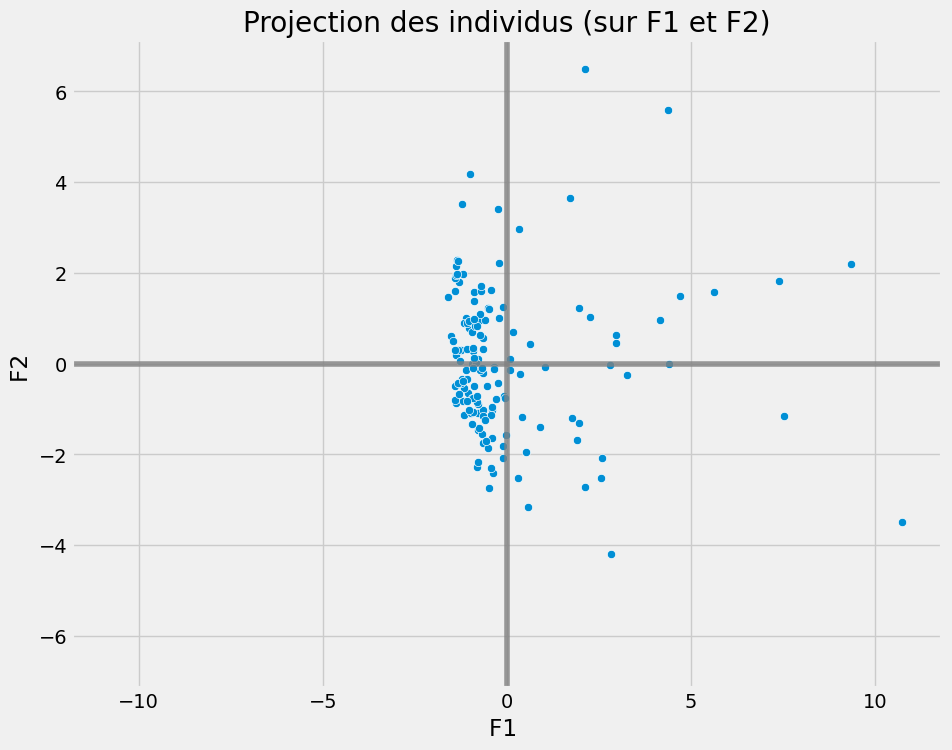

In [110]:
#Travaillons maintenant sur la projection de nos dimensions. Tout d'abord calculons les coordonnées de nos individus dans le nouvel espace :
X_proj = model_pca.transform(X_scaled)
X_proj[:4]
#Rappelons que :
x_y = (0,1)
x_y
#Essayons la version simple avec F1 et F2, les couleurs correspondent au niveau de difficulté :
x_y = [0,1]
display_factorial_planes(X_proj, x_y)


Composantes F2 et F3

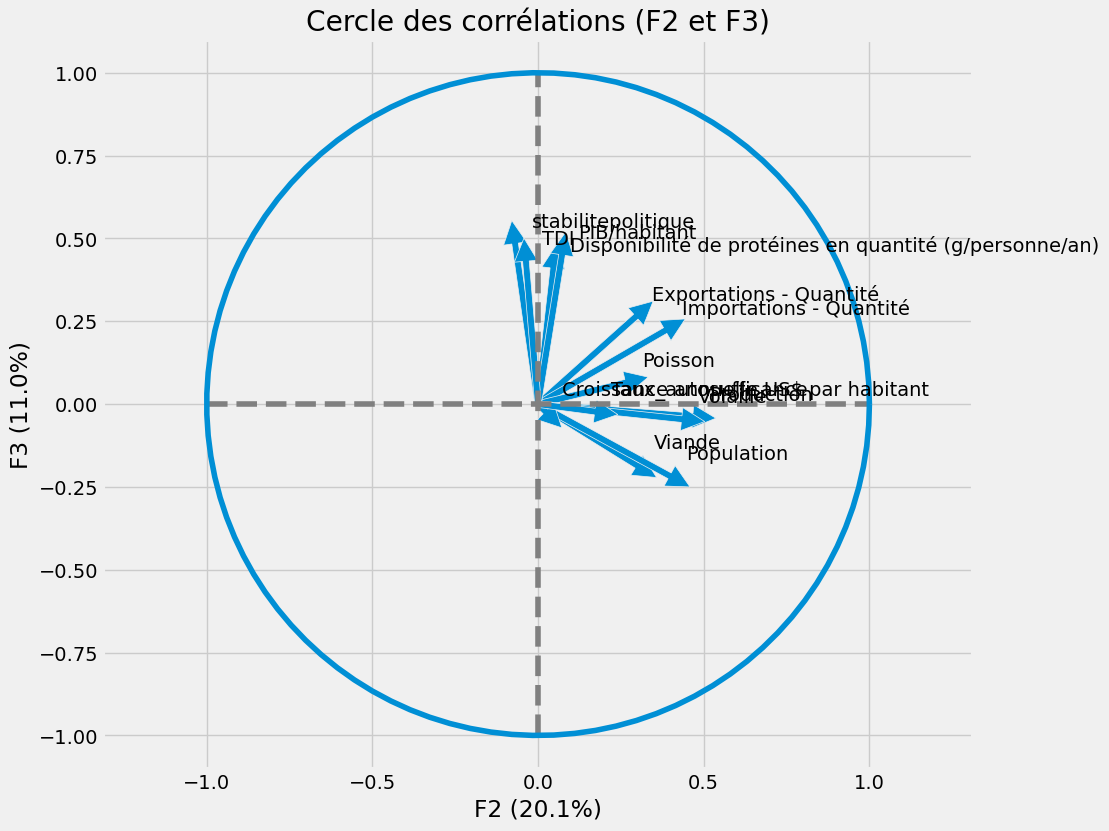

In [111]:
#Définissons nos axes x et y. Nous allons utiliser les 2 premières composantes. Comme - en code - on commence à compter à partir de 0, cela nous donne :
x, y = 1,2
#Pour la partie graphique :

fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, model_pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             model_pca.components_[0, i],  #0 for PC1
             model_pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(model_pca.components_[0, i] + 0.05,
             model_pca.components_[1, i] + 0.05,
             columns[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*model_pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*model_pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  
# Ajouter un unit circle for scale
plt.axis('equal')
plt.show(block=False)

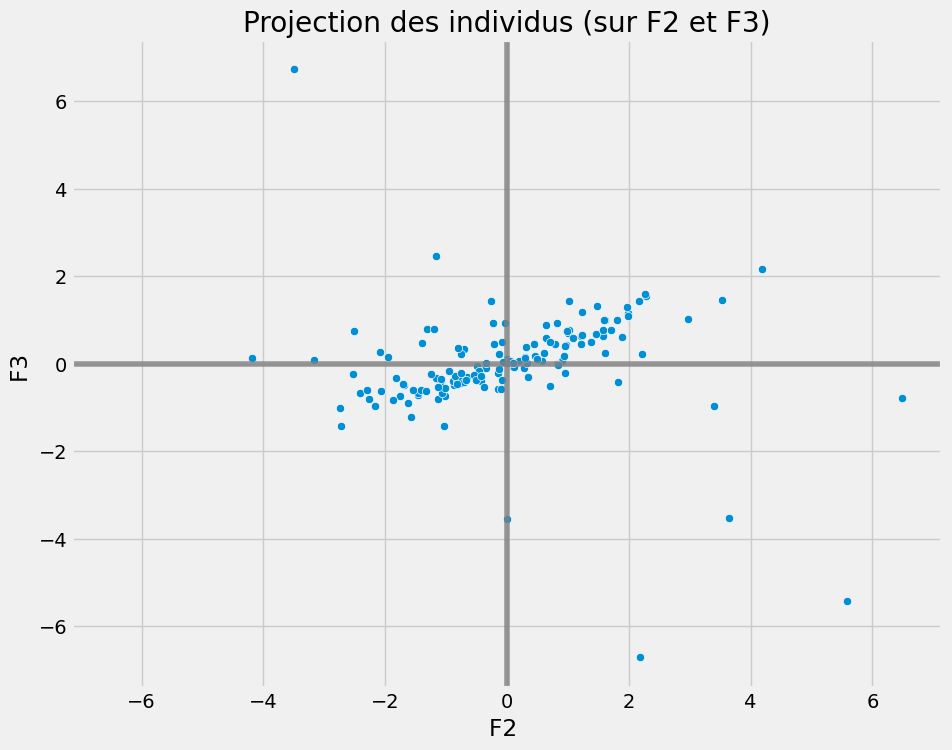

In [112]:
#Travaillons maintenant sur la projection de nos dimensions. Tout d'abord calculons les coordonnées de nos individus dans le nouvel espace :
X_proj = model_pca.transform(X_scaled)
X_proj[:4]
#Rappelons que :
x_y = (1,2)
x_y
#Essayons la version simple avec F1 et F2, les couleurs correspondent au niveau de difficulté :
x_y = [1,2]
display_factorial_planes(X_proj, x_y)


# Classification hiérarchique des données

In [113]:
# Standardisation des données
std_scale = preprocessing.StandardScaler().fit(dispo_alim)
df_scaled = std_scale.transform(dispo_alim)
#On crée un dataframe de nos données centrées réduites car on s'en servira pour afficher la heatmap des centroïds
df_s = pd.DataFrame(df_scaled, index=dispo_alim.index, columns=dispo_alim.columns)
df_s.head()

Disponibilité de protéines en quantité (g/personne/an)  \
Zone                                                                     
Afghanistan                                             -1.258923        
Afrique du Sud                                           1.084957        
Albanie                                                 -0.230607        
Allemagne                                                0.207914        
Angola                                                  -0.699723        

                Production  Exportations - Quantité  Importations - Quantité  \
Zone                                                                           
Afghanistan      -0.442081                -0.318759                -0.362678   
Afrique du Sud    1.926845                 0.024350                 1.613776   
Albanie          -0.478852                -0.318759                -0.318036   
Allemagne         1.798145                 2.848042                 3.529354   
Angola           -0.395409                -0.318759                 0.643812   

                 Poisson  Volaille    Viande  Population  PIB/habitant  \
Zone                                                                     
Afghanistan    -0.235877 -0.404811 -0.173117    0.517003     -0.868274   
Afrique du Sud -0.208045  2.625778  0.240719    1.168003     -0.326754   
Albanie        -0.221961 -0.419515 -0.380034   -0.533086     -0.376736   
Allemagne      -0.027140  2.068479  2.689246    1.974102      1.472417   
Angola         -0.082803 -0.019554 -0.207603    0.313367     -0.627268   

                stabilitepolitique  Croissance annuelle US$ par habitant  \
Zone                                                                       
Afghanistan              -3.338327                             -0.653263   
Afrique du Sud           -0.369504                              1.536635   
Albanie                   0.408045                              0.478129   
Allemagne                 0.655447                             -0.059440   
Angola                   -0.487314                              1.437409   

                Taux_autosuffisance       TDI  
Zone                                           
Afghanistan               -0.345435 -0.054885  
Afrique du Sud             0.118006 -0.478111  
Albanie                   -1.034975  0.694132  
Allemagne                  0.218712  0.159904  
Angola                    -1.144044  0.812609

In [114]:
df_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [115]:
df_scaled.mean(axis=0)

array([-1.99987194e-16,  0.00000000e+00,  1.83811759e-17, -2.94098814e-17,
       -1.17639526e-17, -2.35279052e-17,  2.35279052e-17, -6.39664921e-17,
       -2.35279052e-17, -1.17639526e-17,  8.23476681e-17,  6.47017392e-17,
       -2.35279052e-16])

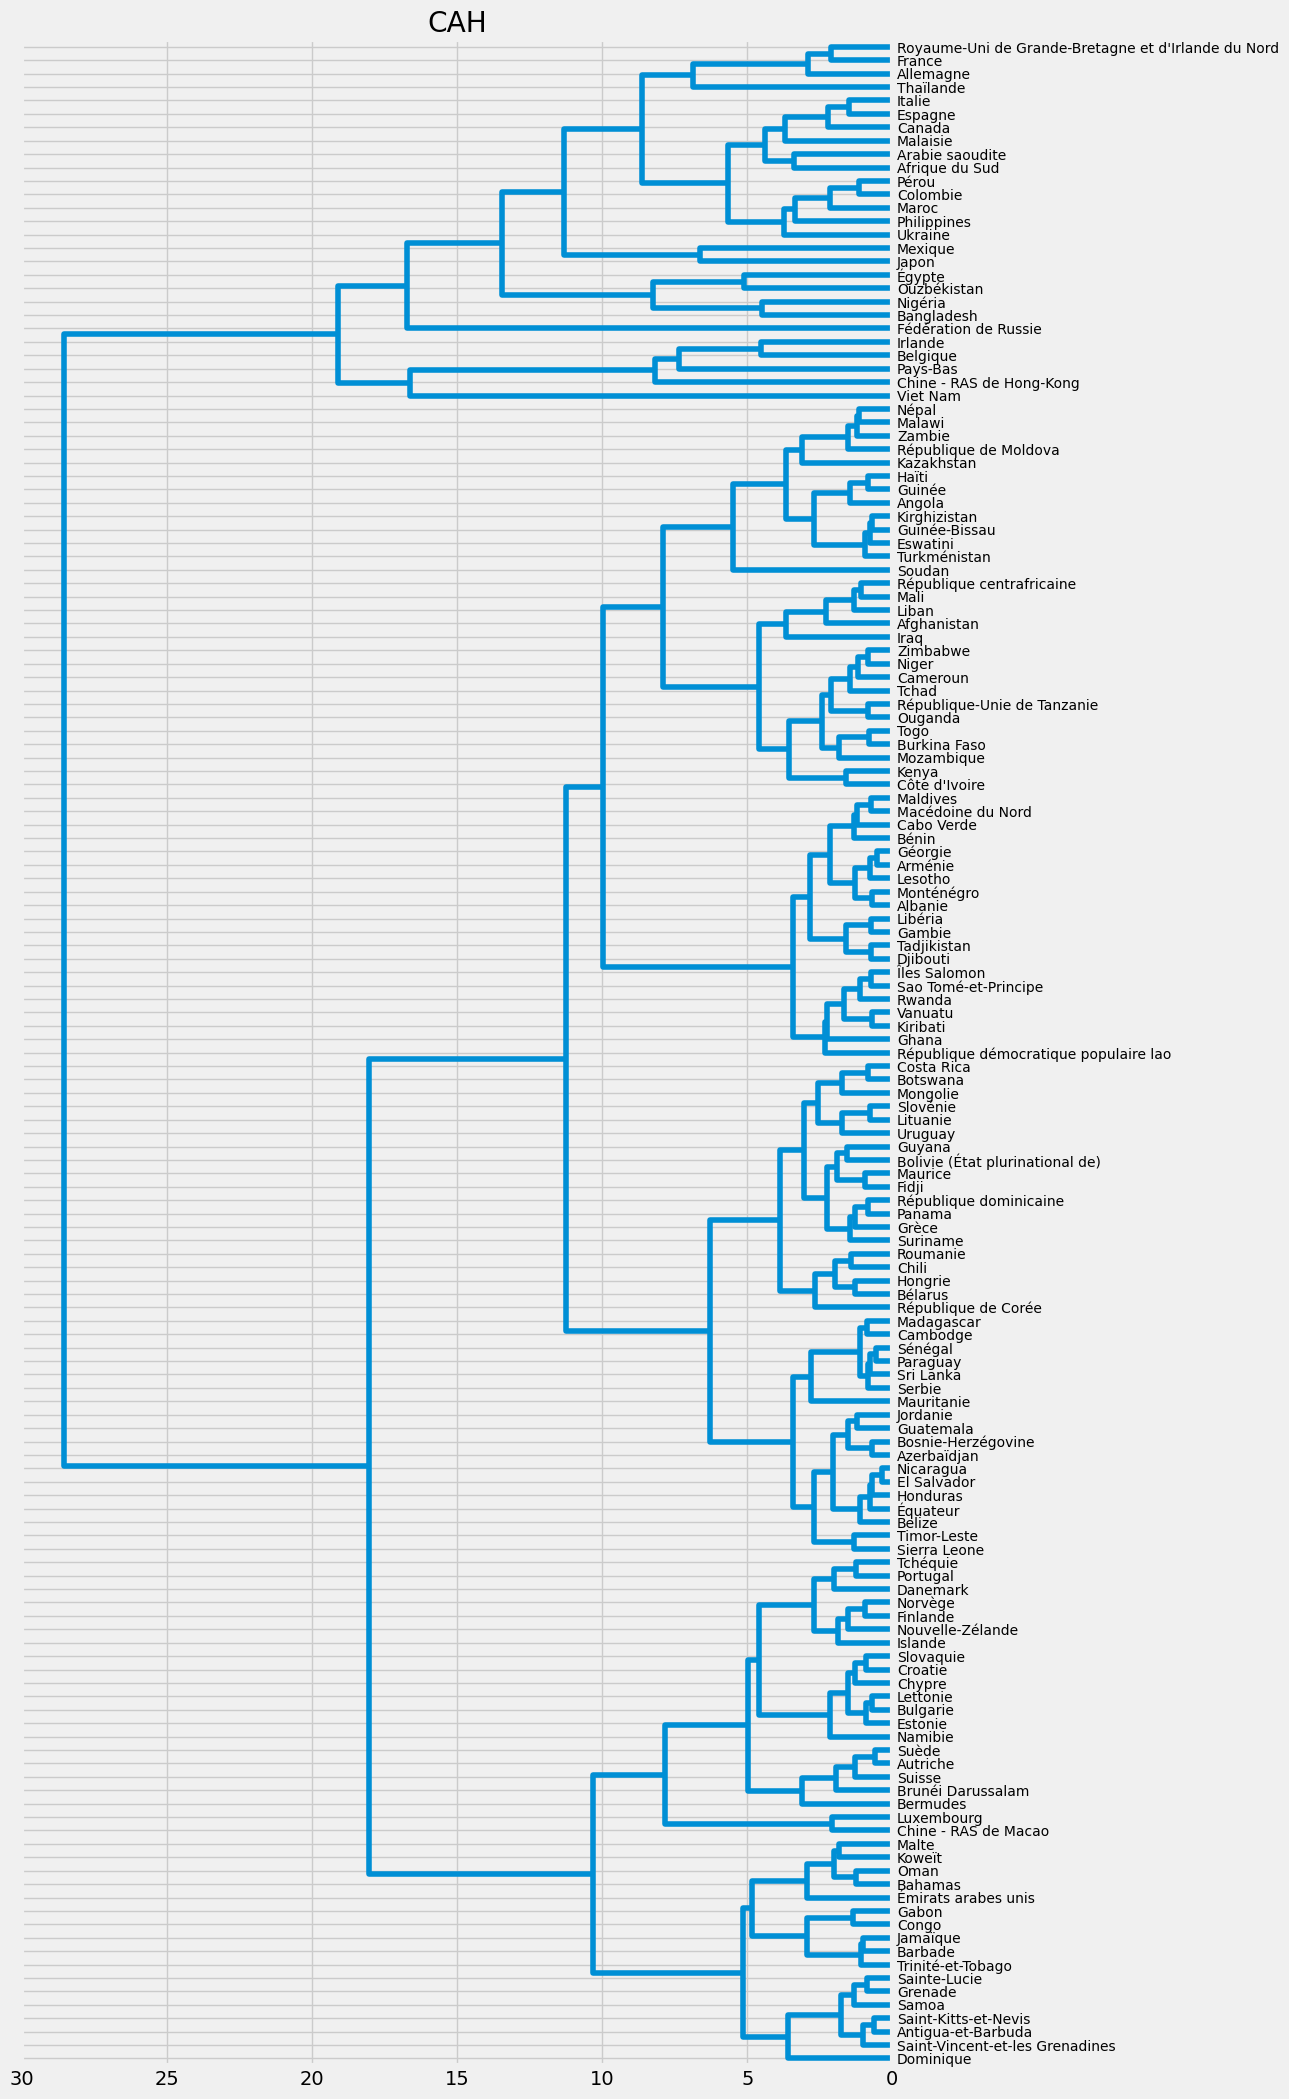

In [116]:
#Dendogramme
Z = linkage(df_scaled,method='ward',metric='euclidean')
plt.figure(figsize=(10, 25))
plt.title("CAH")
dendrogram(Z,labels=dispo_alim.index,orientation='left',color_threshold=0,leaf_font_size=10)
plt.show()

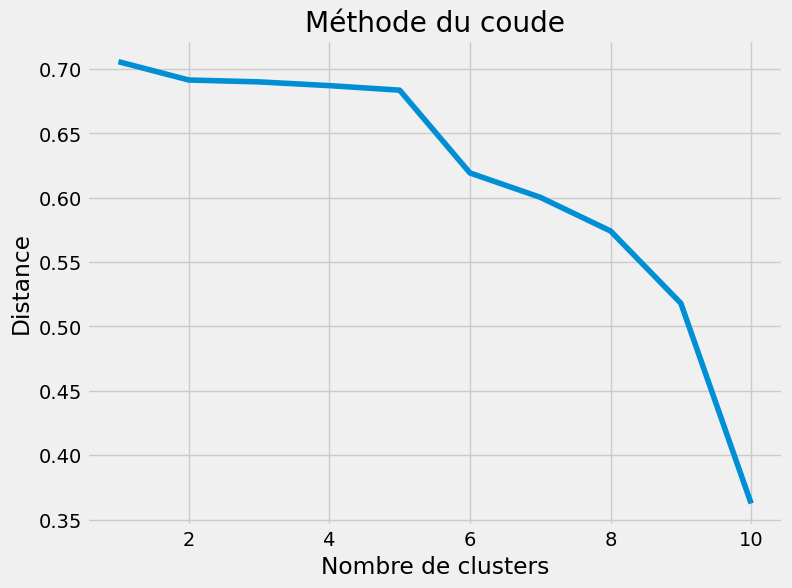

In [117]:
import matplotlib.pyplot as plt

distances = Z[:, 2]

fig = plt.figure(figsize=(8, 6))  # Définir la taille de la figure (8 pouces de largeur, 6 pouces de hauteur)

plt.plot(range(1, 11), distances[:10][::-1])  # Limit the x-axis to 10 clusters
plt.xlabel('Nombre de clusters')
plt.ylabel('Distance')
plt.title('Méthode du coude')
plt.show()


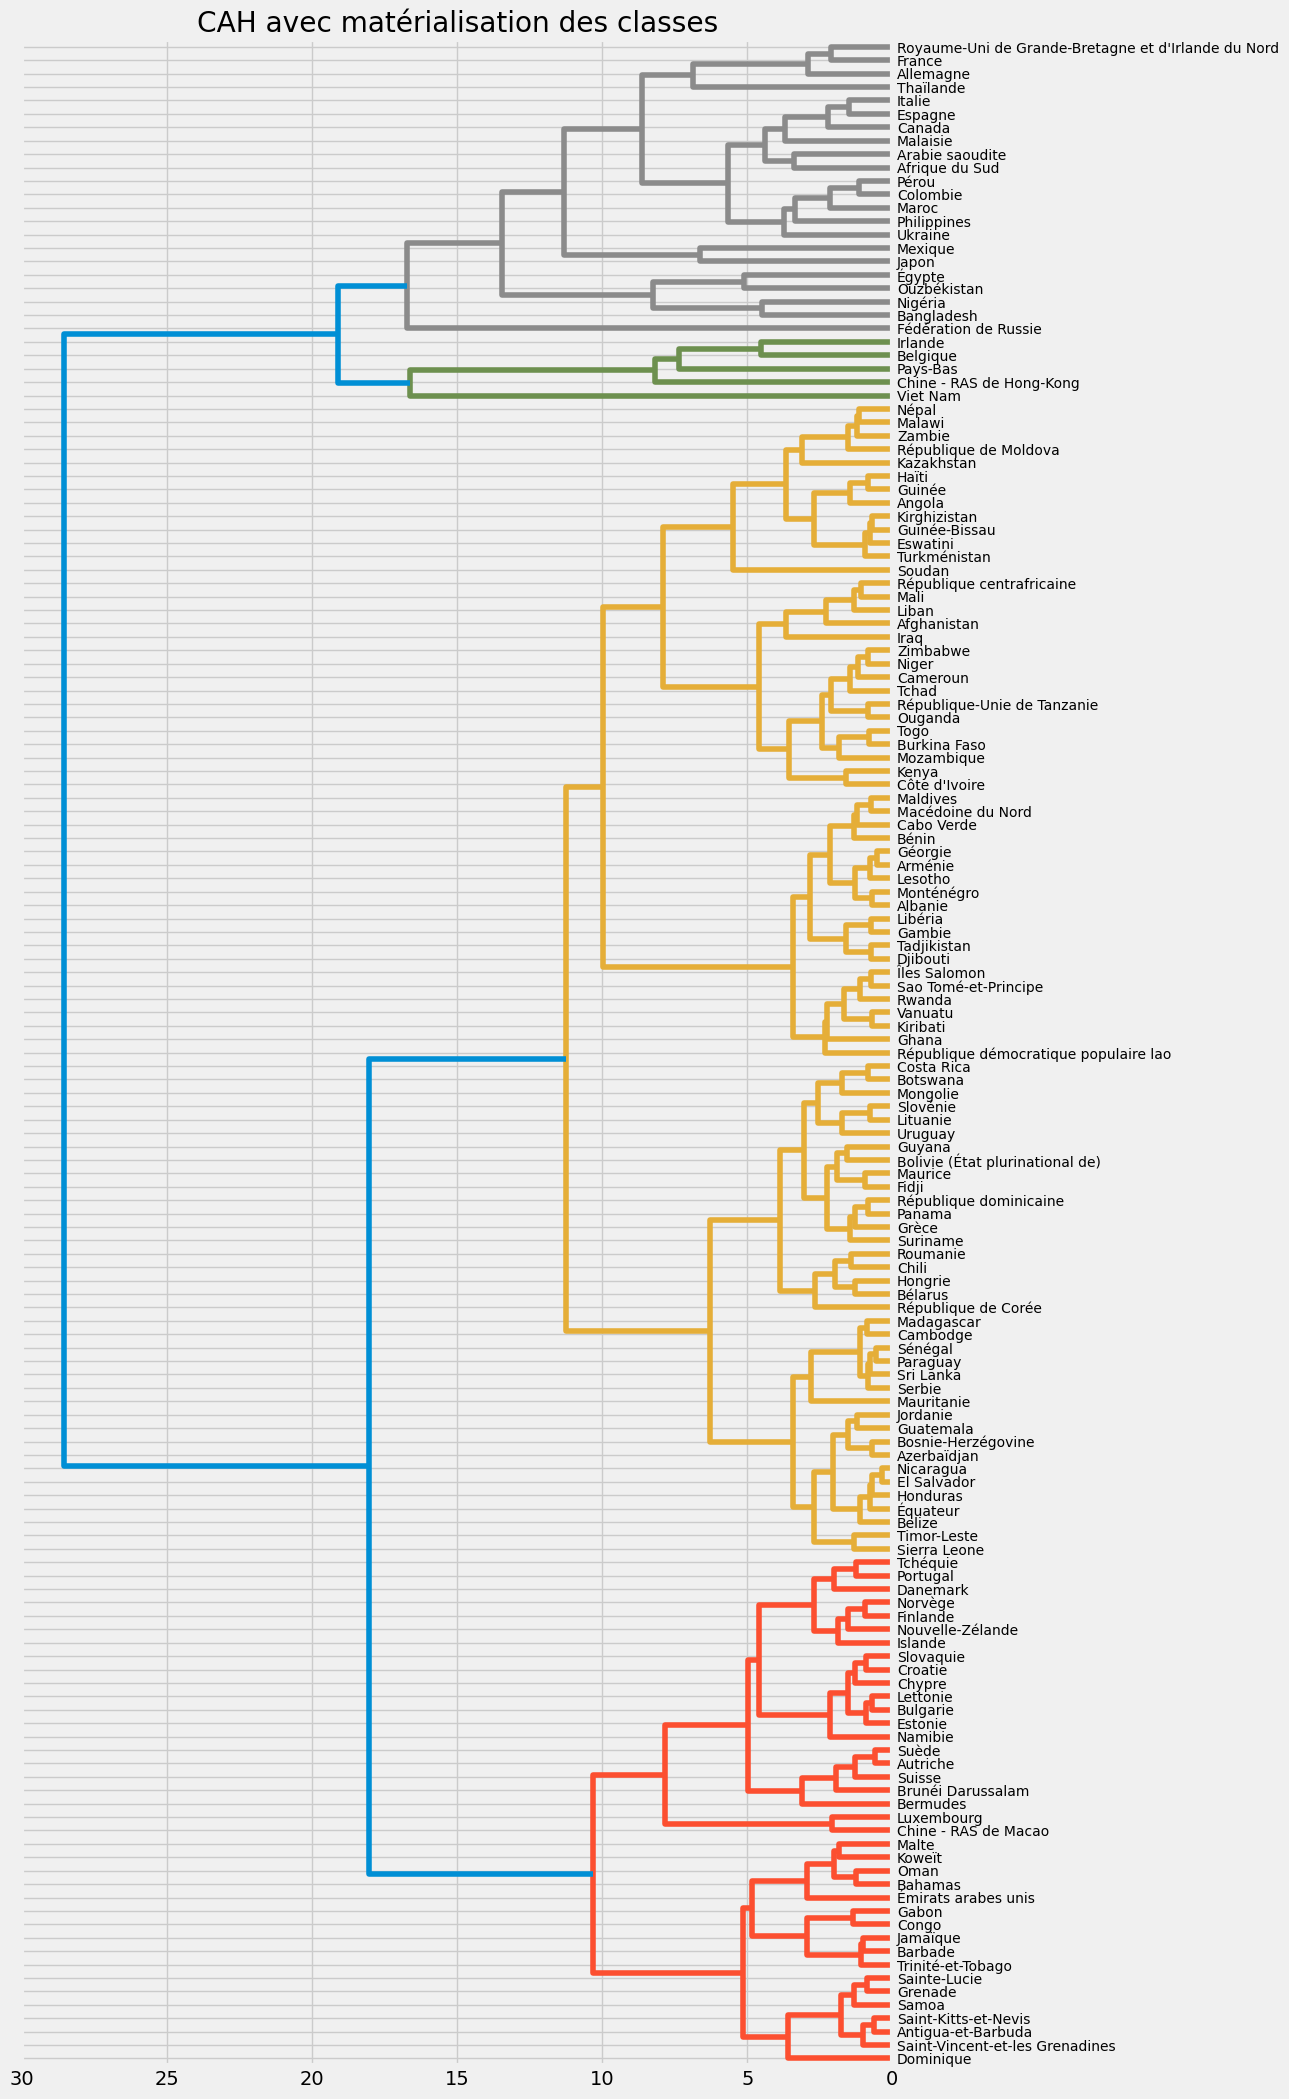

In [118]:
#Matérialisation des classes
plt.figure(figsize=(10,25))
plt.title('CAH avec matérialisation des classes')
dendrogram(Z,labels=dispo_alim.index,orientation='left',color_threshold=17,leaf_font_size=10)
plt.show()

In [119]:
groupes_cah = fcluster(Z,t=17,criterion='distance')
print(np.unique(groupes_cah).size, "groupes constitués")

4 groupes constitués


In [120]:
df_s["cah"] = groupes_cah
df_s

Disponibilité de protéines en quantité (g/personne/an)  \
Zone                                                                          
Afghanistan                                                  -1.258923        
Afrique du Sud                                                1.084957        
Albanie                                                      -0.230607        
Allemagne                                                     0.207914        
Angola                                                       -0.699723        
...                                                                ...        
Zimbabwe                                                     -0.891789        
Égypte                                                       -0.511057        
Émirats arabes unis                                           1.445293        
Équateur                                                     -0.320691        
Îles Salomon                                                 -0.606240        

                     Production  Exportations - Quantité  \
Zone                                                       
Afghanistan           -0.442081                -0.318759   
Afrique du Sud         1.926845                 0.024350   
Albanie               -0.478852                -0.318759   
Allemagne              1.798145                 2.848042   
Angola                -0.395409                -0.318759   
...                         ...                      ...   
Zimbabwe              -0.348738                -0.318759   
Égypte                 1.245160                -0.290939   
Émirats arabes unis   -0.377024                 0.163448   
Équateur              -0.014967                -0.318759   
Îles Salomon          -0.484509                -0.300213   

                     Importations - Quantité   Poisson  Volaille    Viande  \
Zone                                                                         
Afghanistan                        -0.362678 -0.235877 -0.404811 -0.173117   
Afrique du Sud                      1.613776 -0.208045  2.625778  0.240719   
Albanie                            -0.318036 -0.221961 -0.419515 -0.380034   
Allemagne                           3.529354 -0.027140  2.068479  2.689246   
Angola                              0.643812 -0.082803 -0.019554 -0.207603   
...                                      ...       ...       ...       ...   
Zimbabwe                           -0.451964 -0.228919 -0.376872  0.257962   
Égypte                              0.018814 -0.138466  1.349431  1.706387   
Émirats arabes unis                 1.487965  0.118975  0.117197 -0.000685   
Équateur                           -0.480373 -0.228919  0.012796 -0.362791   
Îles Salomon                       -0.451964 -0.187171 -0.484215 -0.380034   

                     Population  PIB/habitant  stabilitepolitique  \
Zone                                                                
Afghanistan            0.517003     -0.868274           -3.338327   
Afrique du Sud         1.168003     -0.326754           -0.369504   
Albanie               -0.533086     -0.376736            0.408045   
Allemagne              1.974102      1.472417            0.655447   
Angola                 0.313367     -0.627268           -0.487314   
...                         ...           ...                 ...   
Zimbabwe              -0.176296     -0.788564           -0.876088   
Égypte                 2.407319     -0.457331           -1.712543   
Émirats arabes unis   -0.325562      2.119939            0.690791   
Équateur              -0.096192     -0.429645           -0.122102   
Îles Salomon          -0.603741     -0.840510            0.195987   

                     Croissance annuelle US$ par habitant  \
Zone                                                        
Afghanistan                                     -0.653263   
Afrique du Sud                                   1.536635   
Albanie                                          0.4781

Clusters

In [121]:
clustercah1 = df_s[df_s["cah"]==1]
clustercah4 = df_s[df_s["cah"]==4]
clustercah2 = df_s[df_s["cah"]==2]
clustercah3 = df_s[df_s["cah"]==3]

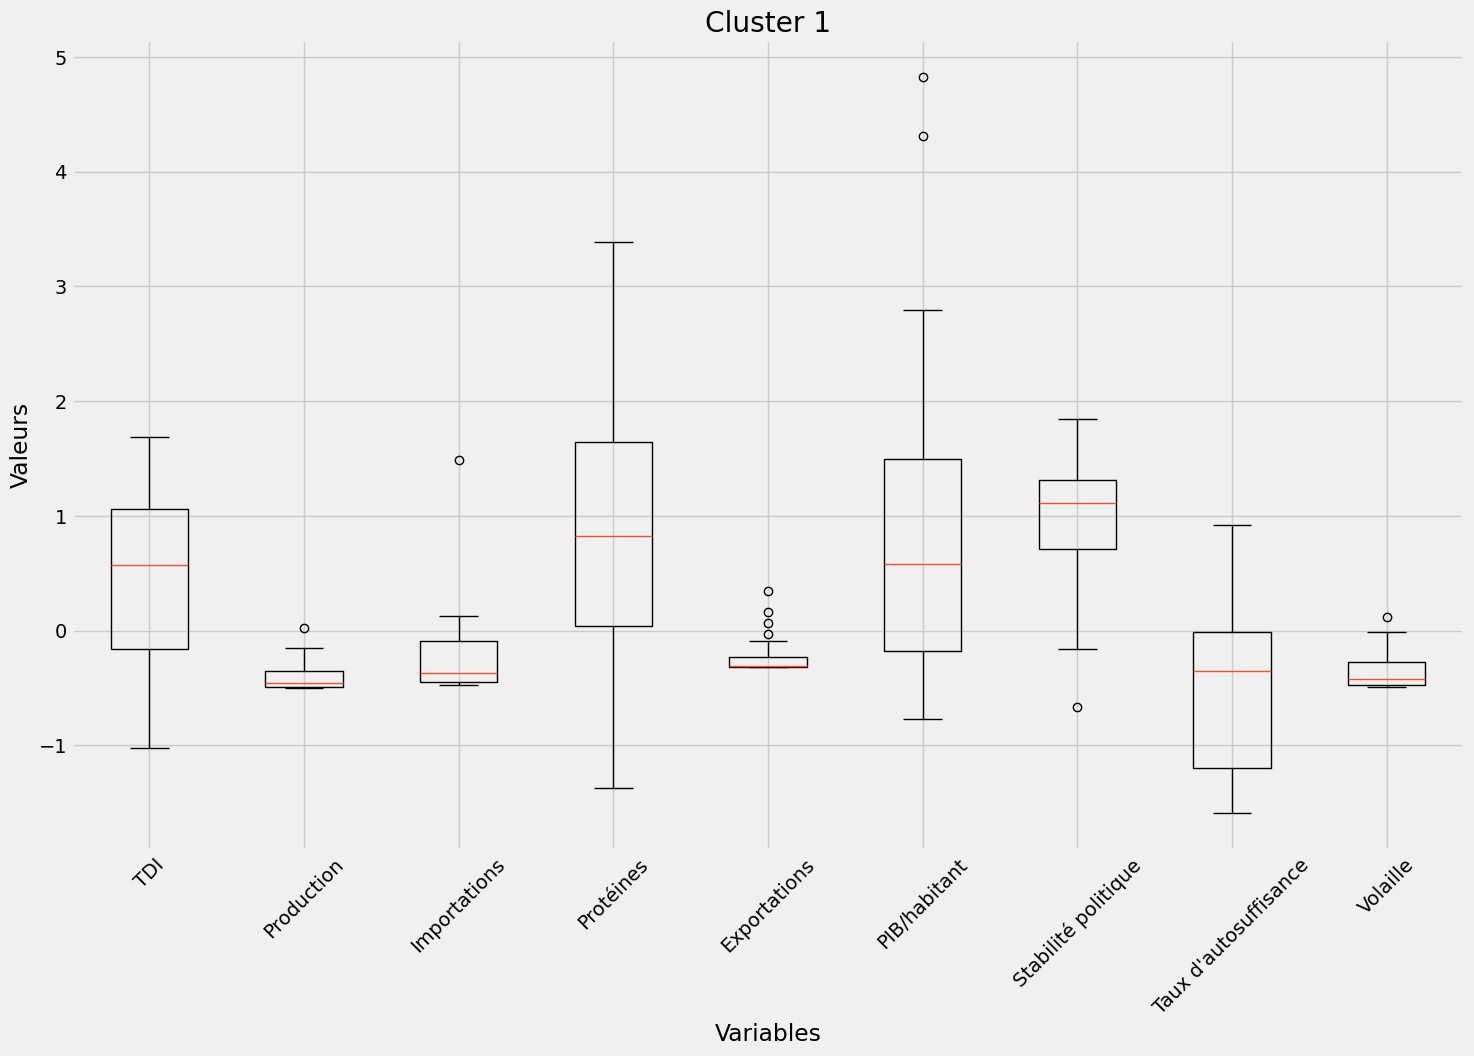

In [122]:
#cluster 1
plt.figure(figsize=(16, 10))

dataclust = [clustercah1['TDI'], clustercah1['Production'], clustercah1['Importations - Quantité'], clustercah1['Disponibilité de protéines en quantité (g/personne/an)'], clustercah1['Exportations - Quantité'], clustercah1['PIB/habitant'], clustercah1['stabilitepolitique'], clustercah1['Taux_autosuffisance'], clustercah1['Volaille']]
variable_names = ['TDI', 'Production', 'Importations', 'Protéines', 'Exportations', 'PIB/habitant', 'Stabilité politique', 'Taux d\'autosuffisance', 'Volaille']

plt.boxplot(dataclust)
plt.xticks(range(1, len(dataclust) + 1), variable_names, rotation=45)  # Set x-axis labels

plt.title('Cluster 1')
plt.xlabel('Variables')
plt.ylabel('Valeurs')

plt.show()

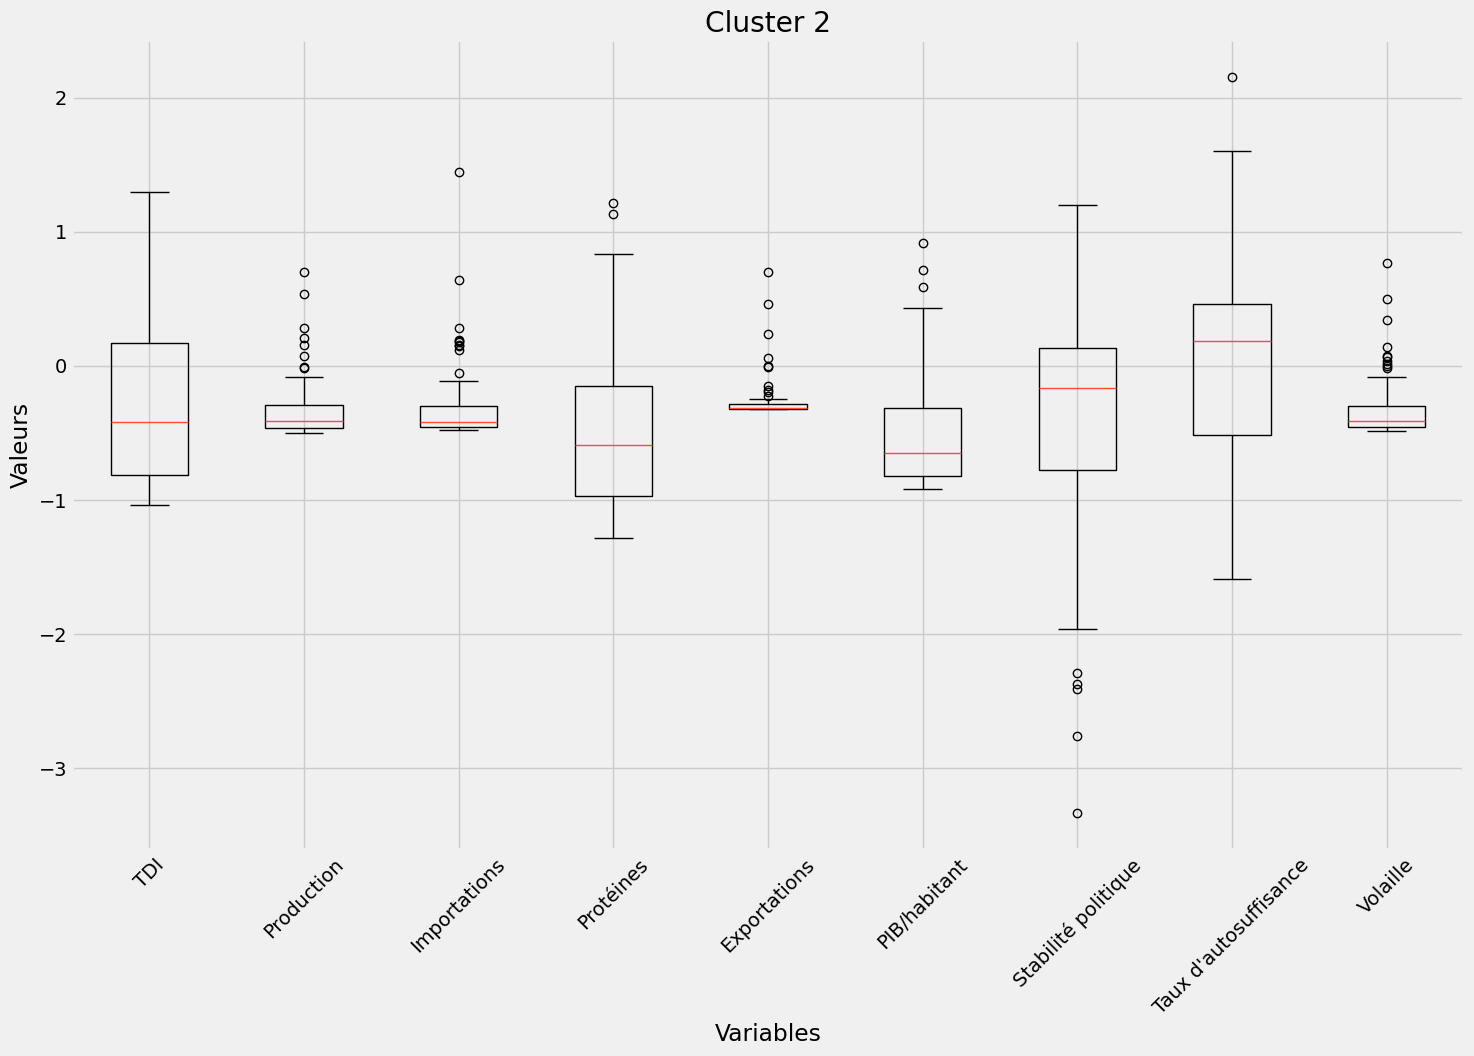

In [123]:
#cluster 2
plt.figure(figsize=(16, 10))

dataclust = [clustercah2['TDI'], clustercah2['Production'], clustercah2['Importations - Quantité'], clustercah2['Disponibilité de protéines en quantité (g/personne/an)'], clustercah2['Exportations - Quantité'], clustercah2['PIB/habitant'], clustercah2['stabilitepolitique'], clustercah2['Taux_autosuffisance'], clustercah2['Volaille']]
variable_names = ['TDI', 'Production', 'Importations', 'Protéines', 'Exportations', 'PIB/habitant', 'Stabilité politique', 'Taux d\'autosuffisance', 'Volaille']

plt.boxplot(dataclust)
plt.xticks(range(1, len(dataclust) + 1), variable_names, rotation=45)  # Set x-axis labels

plt.title('Cluster 2')
plt.xlabel('Variables')
plt.ylabel('Valeurs')

plt.show()

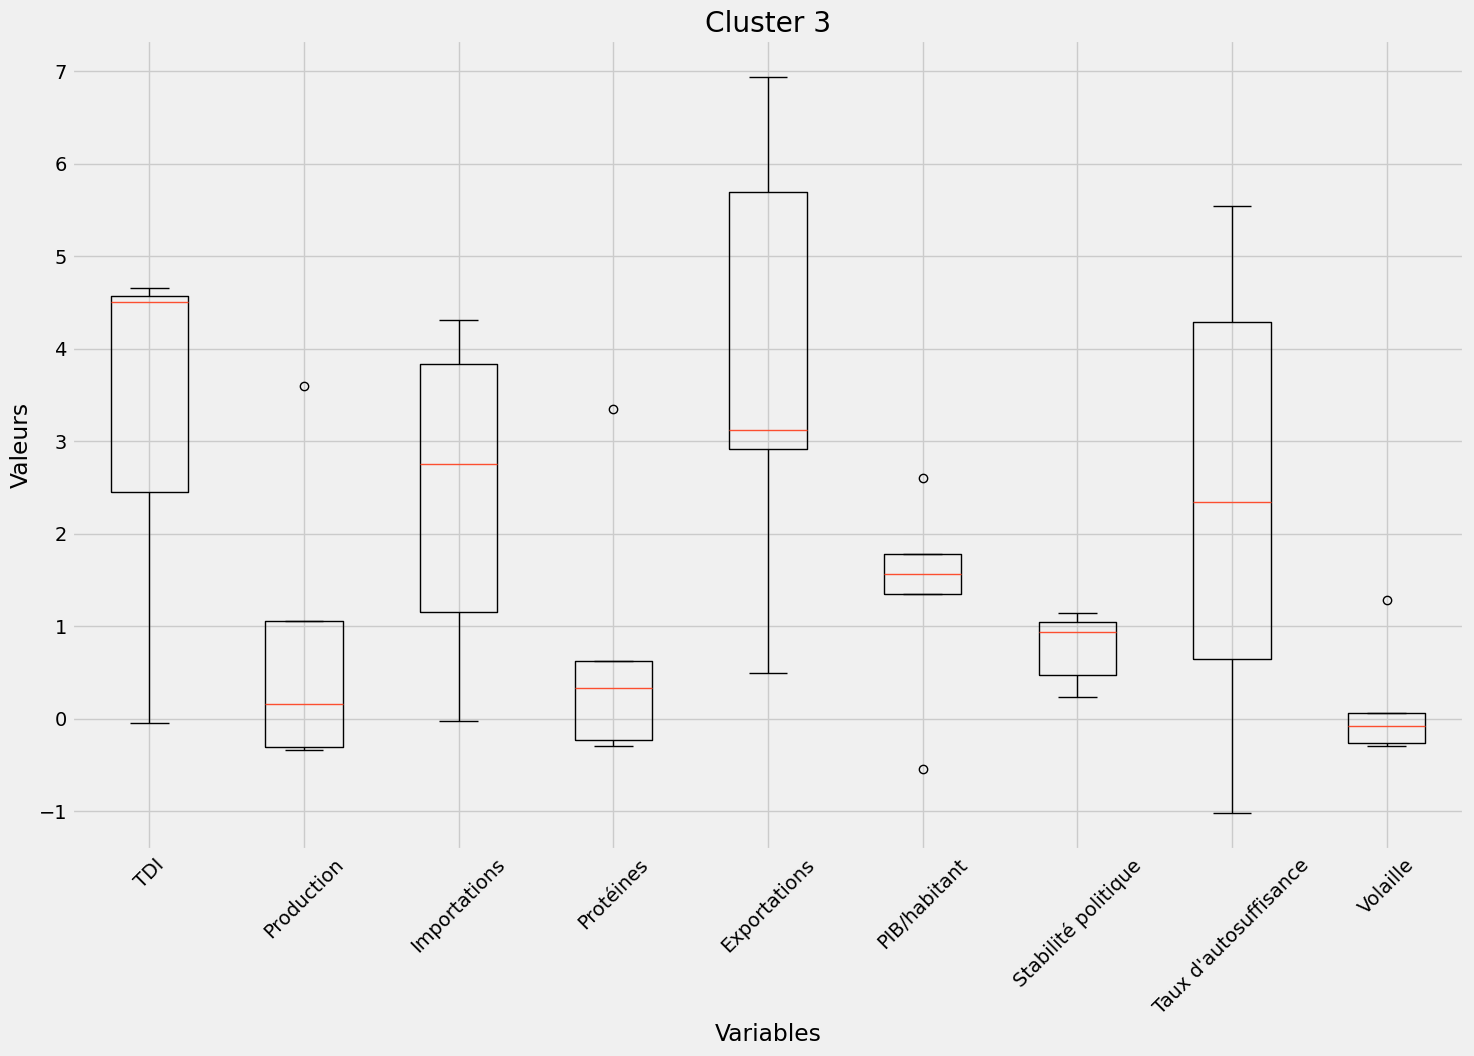

In [124]:
#cluster 3
plt.figure(figsize=(16, 10))

dataclust = [clustercah3['TDI'], clustercah3['Production'], clustercah3['Importations - Quantité'], clustercah3['Disponibilité de protéines en quantité (g/personne/an)'], clustercah3['Exportations - Quantité'], clustercah3['PIB/habitant'], clustercah3['stabilitepolitique'], clustercah3['Taux_autosuffisance'], clustercah3['Volaille']]
variable_names = ['TDI', 'Production', 'Importations', 'Protéines', 'Exportations', 'PIB/habitant', 'Stabilité politique', 'Taux d\'autosuffisance', 'Volaille']

plt.boxplot(dataclust)
plt.xticks(range(1, len(dataclust) + 1), variable_names, rotation=45)  # Set x-axis labels

plt.title('Cluster 3')
plt.xlabel('Variables')
plt.ylabel('Valeurs')

plt.show()

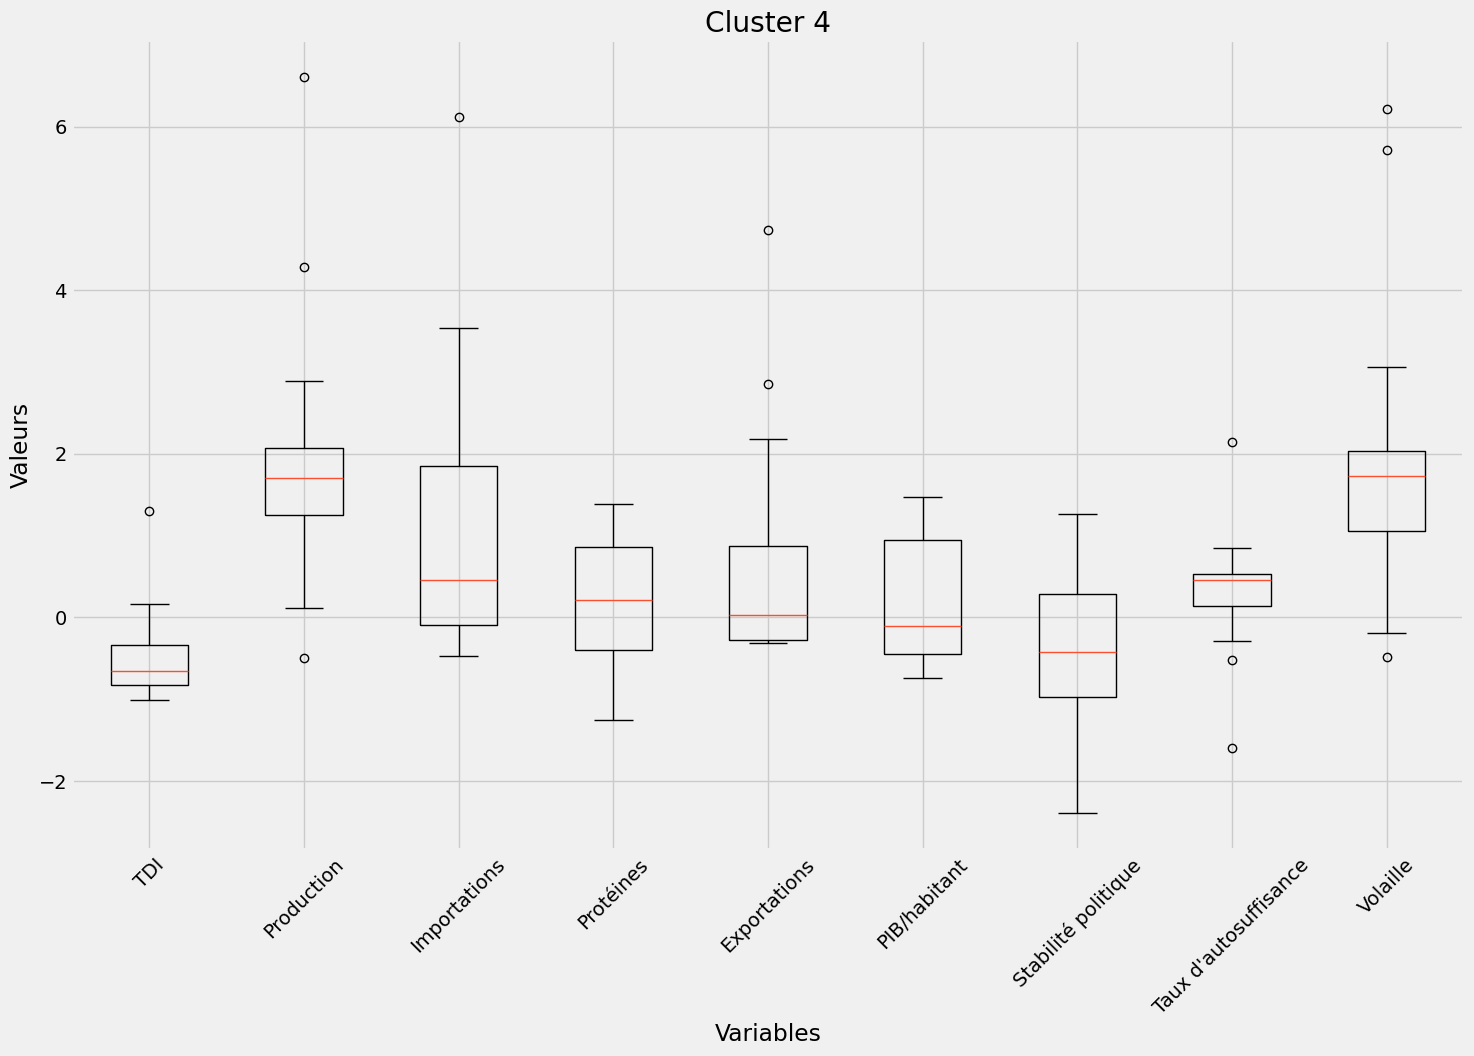

In [125]:
#cluster 4
plt.figure(figsize=(16, 10))

dataclust = [clustercah4['TDI'], clustercah4['Production'], clustercah4['Importations - Quantité'], clustercah4['Disponibilité de protéines en quantité (g/personne/an)'], clustercah4['Exportations - Quantité'], clustercah4['PIB/habitant'], clustercah4['stabilitepolitique'], clustercah4['Taux_autosuffisance'], clustercah4['Volaille']]
variable_names = ['TDI', 'Production', 'Importations', 'Protéines', 'Exportations', 'PIB/habitant', 'Stabilité politique', 'Taux d\'autosuffisance', 'Volaille']

plt.boxplot(dataclust)
plt.xticks(range(1, len(dataclust) + 1), variable_names, rotation=45)  # Set x-axis labels

plt.title('Cluster 4')
plt.xlabel('Variables')
plt.ylabel('Valeurs')

plt.show()

In [126]:
#Le cluster 3 est celui qui a l air le plus interessant pour le cah
payscah=clustercah3.index
payscah

Index(['Belgique', 'Chine - RAS de Hong-Kong', 'Irlande', 'Pays-Bas',
       'Viet Nam'],
      dtype='object', name='Zone')

# Algorithme du K-means

In [127]:
#Méthode du coude
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# Liste contenant les valeurs SSE(sum of the squared Euclidean distances of each point to its closest centroid) vpour chaque k
sse = []
for k in range(1, 15):
    kmeans = cluster.KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

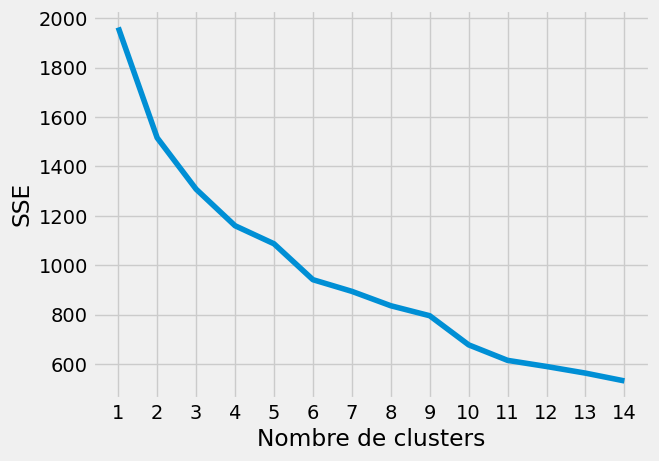

In [128]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.xlabel("Nombre de clusters")
plt.ylabel("SSE")
plt.show()

In [129]:
#Selection du nombre de clusters avec la methode du coude
print("Le nombre de cluster idéal selon la méthode du coude est de 4")

Le nombre de cluster idéal selon la méthode du coude est de 4


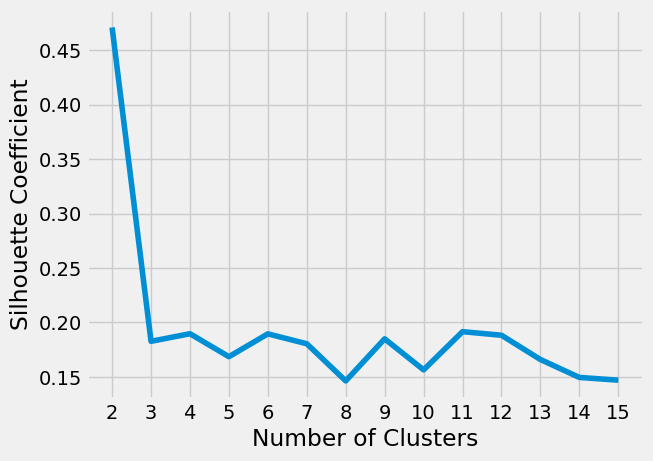

In [130]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice we start at 2 clusters for silhouette coefficient
for k in range(2, 16):
    kmeans = cluster.KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_scaled)
    score = metrics.silhouette_score(df_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2, 16), silhouette_coefficients)
plt.xticks(range(2, 16))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [131]:
cls = cluster.KMeans(init='random', n_clusters=4, n_init=10, max_iter =300, random_state = 42)
cls.fit(df_scaled)

KMeans(init='random', n_clusters=4, random_state=42)

# Centroides

In [132]:
# Standardisation des données
std_scale2 = preprocessing.StandardScaler().fit(dispo_alim)
df_scaled2 = std_scale2.transform(dispo_alim)
#On crée un dataframe de nos données centrées réduites car on s'en servira pour afficher la heatmap des centroïds
df_s2 = pd.DataFrame(df_scaled2, index=dispo_alim.index, columns=dispo_alim.columns)
df_s2.head()

Disponibilité de protéines en quantité (g/personne/an)  \
Zone                                                                     
Afghanistan                                             -1.258923        
Afrique du Sud                                           1.084957        
Albanie                                                 -0.230607        
Allemagne                                                0.207914        
Angola                                                  -0.699723        

                Production  Exportations - Quantité  Importations - Quantité  \
Zone                                                                           
Afghanistan      -0.442081                -0.318759                -0.362678   
Afrique du Sud    1.926845                 0.024350                 1.613776   
Albanie          -0.478852                -0.318759                -0.318036   
Allemagne         1.798145                 2.848042                 3.529354   
Angola           -0.395409                -0.318759                 0.643812   

                 Poisson  Volaille    Viande  Population  PIB/habitant  \
Zone                                                                     
Afghanistan    -0.235877 -0.404811 -0.173117    0.517003     -0.868274   
Afrique du Sud -0.208045  2.625778  0.240719    1.168003     -0.326754   
Albanie        -0.221961 -0.419515 -0.380034   -0.533086     -0.376736   
Allemagne      -0.027140  2.068479  2.689246    1.974102      1.472417   
Angola         -0.082803 -0.019554 -0.207603    0.313367     -0.627268   

                stabilitepolitique  Croissance annuelle US$ par habitant  \
Zone                                                                       
Afghanistan              -3.338327                             -0.653263   
Afrique du Sud           -0.369504                              1.536635   
Albanie                   0.408045                              0.478129   
Allemagne                 0.655447                             -0.059440   
Angola                   -0.487314                              1.437409   

                Taux_autosuffisance       TDI  
Zone                                           
Afghanistan               -0.345435 -0.054885  
Afrique du Sud             0.118006 -0.478111  
Albanie                   -1.034975  0.694132  
Allemagne                  0.218712  0.159904  
Angola                    -1.144044  0.812609

In [133]:
#On ajoute la variable au dataframe initial
df_s2['Kmeans'] = cls.labels_
for i in range(0,4):
    print("Groupe {}:".format(i))
    print(", ".join(df_s2[df_s2["Kmeans"]==i].index.get_level_values('Zone').sort_values()))

Groupe 0:
Afghanistan, Angola, Arménie, Azerbaïdjan, Belize, Bolivie (État plurinational de), Bosnie-Herzégovine, Burkina Faso, Bélarus, Bénin, Cambodge, Cameroun, Congo, Côte d'Ivoire, Djibouti, El Salvador, Eswatini, Gambie, Ghana, Grèce, Guatemala, Guinée, Guinée-Bissau, Géorgie, Haïti, Honduras, Iraq, Jordanie, Kazakhstan, Kenya, Kirghizistan, Lesotho, Liban, Libéria, Macédoine du Nord, Madagascar, Malawi, Mali, Maroc, Mauritanie, Mongolie, Monténégro, Mozambique, Nicaragua, Niger, Népal, Ouganda, Ouzbékistan, Paraguay, Rwanda, République centrafricaine, République de Moldova, République démocratique populaire lao, République-Unie de Tanzanie, Sao Tomé-et-Principe, Serbie, Sierra Leone, Soudan, Sri Lanka, Sénégal, Tadjikistan, Tchad, Timor-Leste, Togo, Turkménistan, Zambie, Zimbabwe, Équateur, Îles Salomon
Groupe 1:
Albanie, Antigua-et-Barbuda, Autriche, Bahamas, Barbade, Bermudes, Botswana, Brunéi Darussalam, Bulgarie, Cabo Verde, Chili, Chine - RAS de Macao, Chypre, Costa Rica, C

In [134]:
#On calcule les centroides
centroid_kmeans = df_s2.groupby('Kmeans').mean()
centroid_kmeans.head(10)

Disponibilité de protéines en quantité (g/personne/an)  Production  \
Kmeans                                                                       
0                                               -0.650530        -0.342445   
1                                                0.636179        -0.345812   
2                                                0.243071         1.911213   
3                                                0.673971         1.474557   

        Exportations - Quantité  Importations - Quantité   Poisson  Volaille  \
Kmeans                                                                         
0                     -0.288722                -0.313095 -0.132315 -0.333249   
1                     -0.200525                -0.263457 -0.192090 -0.321705   
2                      0.675427                 0.985147  0.262893  1.978395   
3                      3.743834                 3.633250  3.055198  0.812718   

          Viande  Population  PIB/habitant  stabilitepolitique  \
Kmeans                                                           
0      -0.052165   -0.177470     -0.641468           -0.622369   
1      -0.307197   -0.481155      0.601454            0.864256   
2       1.140085    1.850904      0.225691           -0.585903   
3      -0.048966    0.997044      1.017763            0.789751   

        Croissance annuelle US$ par habitant  Taux_autosuffisance       TDI  
Kmeans                                                                       
0                                   0.038508            -0.075110 -0.242172  
1                                   0.030468            -0.214192  0.245780  
2                                  -0.167705             0.443735 -0.587282  
3                                  -0.247562             1.834957  2.722599

In [140]:
centroid_kmeans.loc[centroid_kmeans.index==3]

Disponibilité de protéines en quantité (g/personne/an)  Production  \
Kmeans                                                                       
3                                                0.673971         1.474557   

        Exportations - Quantité  Importations - Quantité   Poisson  Volaille  \
Kmeans                                                                         
3                      3.743834                  3.63325  3.055198  0.812718   

          Viande  Population  PIB/habitant  stabilitepolitique  \
Kmeans                                                           
3      -0.048966    0.997044      1.017763            0.789751   

        Croissance annuelle US$ par habitant  Taux_autosuffisance       TDI  
Kmeans                                                                       
3                                  -0.247562             1.834957  2.722599

In [148]:
cluster3=df_s2.loc[df_s2.Kmeans==3]
#cluster3=cluster.index
cluster3

Disponibilité de protéines en quantité (g/personne/an)  \
Zone                                                                               
Belgique                                                          -0.300295        
Chine - RAS de Hong-Kong                                           3.352351        
Japon                                                              0.224911        
Pays-Bas                                                           0.328593        
Viet Nam                                                          -0.235706        

                          Production  Exportations - Quantité  \
Zone                                                            
Belgique                    0.158990                 2.917591   
Chine - RAS de Hong-Kong   -0.336009                 3.121602   
Japon                       2.889972                 0.042896   
Pays-Bas                    1.058474                 6.937528   
Viet Nam                    3.601356                 5.699554   

                          Importations - Quantité    Poisson  Volaille  \
Zone                                                                     
Belgique                                 1.155174  -0.208045 -0.265118   
Chine - RAS de Hong-Kong                 3.833736   0.793889 -0.076901   
Japon                                    6.114573   4.335448  3.062500   
Pays-Bas                                 2.750136  -0.235877  0.058380   
Viet Nam                                 4.312631  10.590577  1.284731   

                            Viande  Population  PIB/habitant  \
Zone                                                           
Belgique                 -0.035171   -0.264825      1.351779   
Chine - RAS de Hong-Kong -0.000685   -0.394104      1.783085   
Japon                    -0.155873    3.383494      0.938909   
Pays-Bas                  0.033801   -0.088775      1.564970   
Viet Nam                 -0.086901    2.349430     -0.549930   

                          stabilitepolitique  \
Zone                                           
Belgique                            0.466951   
Chine - RAS de Hong-Kong            0.938192   
Japon                               1.268062   
Pays-Bas                            1.044222   
Viet Nam                            0.231330   

                          Croissance annuelle US$ par habitant  \
Zone                                                             
Belgique                                             -0.203742   
Chine - RAS de Hong-Kong                             -0.069061   
Japon                                                -1.095686   
Pays-Bas                                             -0.080896   
Viet Nam                                              0.211576   

                          Taux_autosuffisance       TDI  Kmeans  
Zone                                                             
Belgique                             4.292906  4.503709       3  
Chine - RAS de Hong-Kong            -1.025287  4.661447       3  
Japon                               -0.285295 -0.073974       3  
Pays-Bas                             5.543028  4.566823       3  
Viet Nam                             0.649431 -0.045009       3

In [149]:
#Le cluster 3 (4eme cluster) est celui qui a l air le plus interessant pour les kmeans
pays=cluster3.index
pays

Index(['Belgique', 'Chine - RAS de Hong-Kong', 'Japon', 'Pays-Bas',
       'Viet Nam'],
      dtype='object', name='Zone')

In [150]:
payscah=list(payscah)

In [151]:
pays=list(pays)

In [152]:
payscah.extend(pays)

In [153]:
payscah

['Belgique',
 'Chine - RAS de Hong-Kong',
 'Irlande',
 'Pays-Bas',
 'Viet Nam',
 'Belgique',
 'Chine - RAS de Hong-Kong',
 'Japon',
 'Pays-Bas',
 'Viet Nam']

 Les pays les plus avantageux pour notre exportation de poulet sont principalement la Belgique , l'Irlande, le Japon,la Chine-RAS de Hong-Kong,les Pays-Bas et le Viet Nam